<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Constants" data-toc-modified-id="Constants-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Constants</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#ML-baseline" data-toc-modified-id="ML-baseline-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ML baseline</a></span></li><li><span><a href="#Find-confidence-regions" data-toc-modified-id="Find-confidence-regions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Find confidence regions</a></span></li><li><span><a href="#Get-synthetic-samples" data-toc-modified-id="Get-synthetic-samples-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Get synthetic samples</a></span></li><li><span><a href="#ML" data-toc-modified-id="ML-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ML</a></span><ul class="toc-item"><li><span><a href="#Original" data-toc-modified-id="Original-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Original</a></span></li><li><span><a href="#Original-+-all-synthetic" data-toc-modified-id="Original-+-all-synthetic-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Original + all synthetic</a></span></li><li><span><a href="#Original-+-synthetic-per-class" data-toc-modified-id="Original-+-synthetic-per-class-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Original + synthetic per class</a></span></li><li><span><a href="#Only-synthetic" data-toc-modified-id="Only-synthetic-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Only synthetic</a></span></li></ul></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
import seaborn as sns

import sys
sys.path.append('../helpers')
from main_loop import setup_experiment, run_experiment

2023-11-03 15:56:29.027800: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Constants

In [3]:
epsilon = 0.95

constants_dict = {
    "GRIDSTEP": 0.005,
    "K": 5
}

target_data_dict = {
    "data_name": "MNIST",
    "classes": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "dims": 8,
    "dim_reduction": "UMAP",
    "other": ""
}
target_data_dict["n_class"] = len(target_data_dict["classes"])

## Set up the experiment

In [5]:
setup_dict = setup_experiment(constants_dict, target_data_dict, nr_train_samples=10000, calib_size=0.5)
setup_dict.keys()

Data loaded: ./../pickles/MNIST-10labels-8dims-UMAP.pickle
sample dims: (60000, 2) | (10000, 2)
label dims: (60000,) | (10000,)
train labels: [0 1 2 3 4 5 6 7 8 9]
test labels: [0 1 2 3 4 5 6 7 8 9]
Start preparing grid: (60000, 2)
4000
1
Done preparing grid: (15200000, 2)

Train samples: (10000, 2)
{6: 0.1, 5: 0.09, 8: 0.1, 2: 0.1, 3: 0.1, 1: 0.11, 4: 0.1, 7: 0.1, 9: 0.1, 0: 0.1}
Test samples: (10000, 2)
{7: 0.1, 2: 0.1, 1: 0.11, 0: 0.1, 4: 0.1, 9: 0.1, 5: 0.09, 6: 0.1, 3: 0.1, 8: 0.1}
Prop: (5000, 2) (5000,) 
Calib: (5000, 2) (5000,)
X_prop: (5000, 2)
{5: 0.09, 6: 0.1, 3: 0.1, 7: 0.1, 4: 0.1, 1: 0.11, 2: 0.1, 0: 0.1, 8: 0.1, 9: 0.1}
X_calib: (5000, 2)
{2: 0.1, 9: 0.1, 4: 0.1, 0: 0.1, 5: 0.09, 7: 0.1, 8: 0.1, 3: 0.1, 1: 0.11, 6: 0.1}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


NCMs for labels:   0%|          | 0/10 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
(5000,)


NCMs for labels:   0%|          | 0/10 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
(15200000,)


p-values for labels:   0%|          | 0/10 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
(15200000,)


dict_keys(['grid_arrays', 'grid_points', 'ps_grid', 'X_train', 'y_train', 'X_test', 'y_test', 'X_prop', 'y_prop', 'X_calib', 'y_calib'])

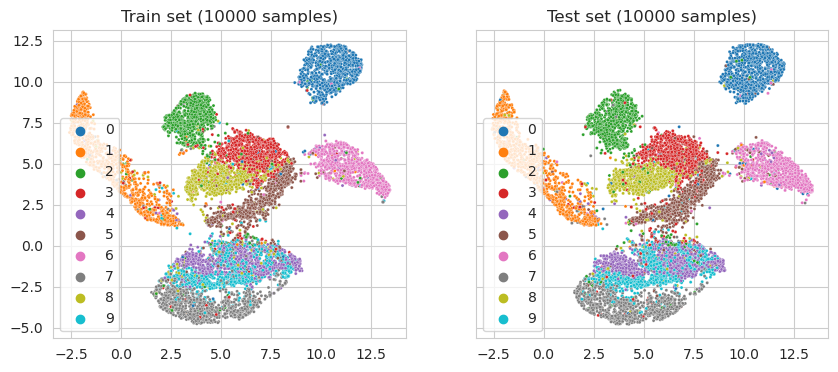

In [6]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.scatterplot(x=setup_dict['X_train'][:, 0], y=setup_dict['X_train'][:, 1], hue=setup_dict['y_train'], palette="tab10", s=5, ax=axs[0])
axs[0].set_title("Train set ({} samples)".format(len(setup_dict['y_train'])))
sns.scatterplot(x=setup_dict['X_test'][:, 0], y=setup_dict['X_test'][:, 1], hue=setup_dict['y_test'], palette="tab10", s=5, ax=axs[1])
axs[1].set_title("Test set ({} samples)".format(len(setup_dict['y_test'])))

plt.legend()
plt.show()

# Run the experiment

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


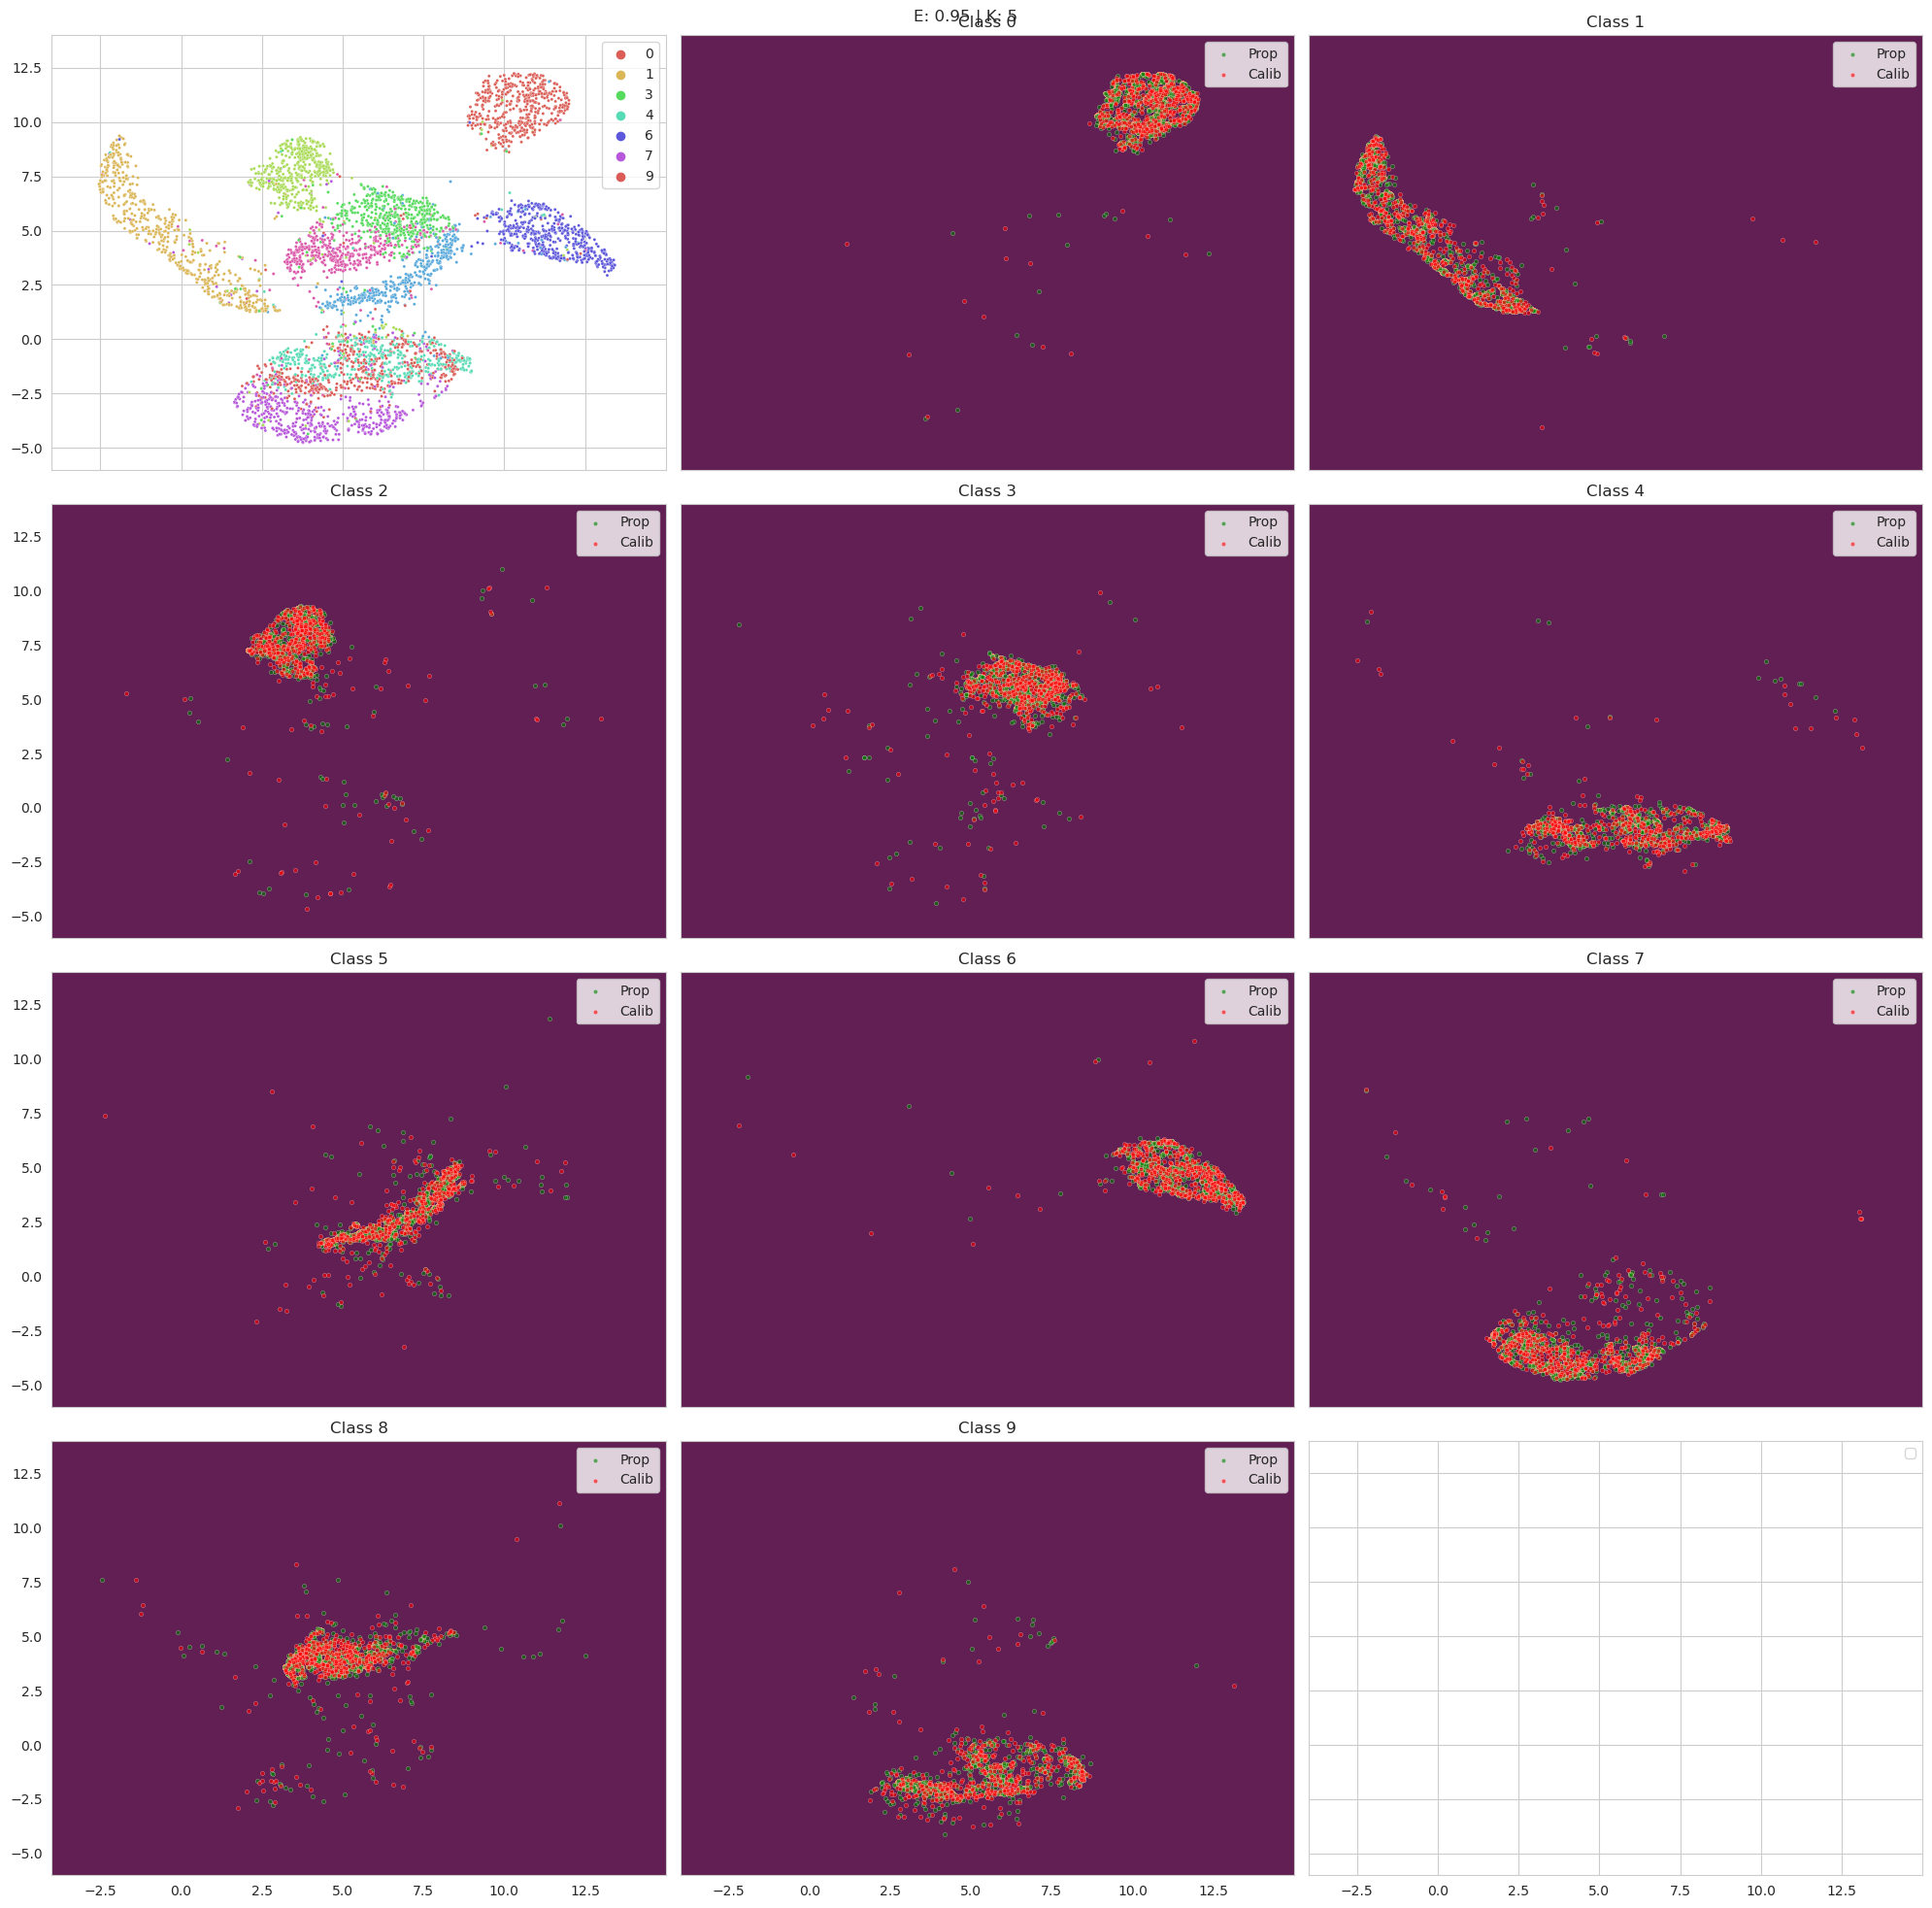

Synthetic samples per class
Label 0: (145024, 2)
Label 1: (128826, 2)
Label 2: (95561, 2)
Label 3: (106896, 2)
Label 4: (93540, 2)
Label 5: (111751, 2)
Label 6: (111745, 2)
Label 7: (125233, 2)
Label 8: (113720, 2)
Label 9: (104111, 2)
(145024,)
(273850,)
(369411,)
(476307,)
(569847,)
(681598,)
(793343,)
(918576,)
(1032296,)
(1136407,)


Baseline results: ORIGINAL


2023-11-03 15:58:15.866732: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


313/313 [==============================] - 0s 882us/step
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       980
           1       0.90      0.90      0.90      1135
           2       0.97      0.87      0.92      1032
           3       0.86      0.55      0.67      1010
           4       0.51      0.36      0.43       982
           5       0.80      0.78      0.79       892
           6       0.85      0.95      0.89       958
           7       0.70      0.85      0.77      1028
           8       0.66      0.81      0.73       974
           9       0.41      0.47      0.44      1009

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



Total synthetic samples: (1136407, 2)
Total O+S samples: (1146407, 2)
ORIGINAL + SYNTHETIC
313/313 [==============================] - 0s 1ms/step
              precision    recall  f

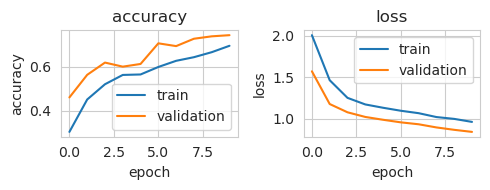

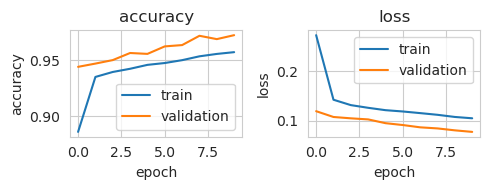

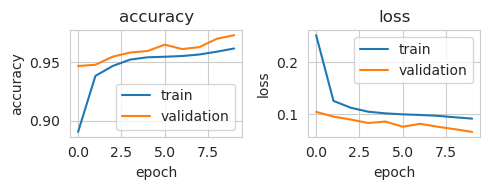

In [7]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[], is_synthetic=True, tf_seed=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


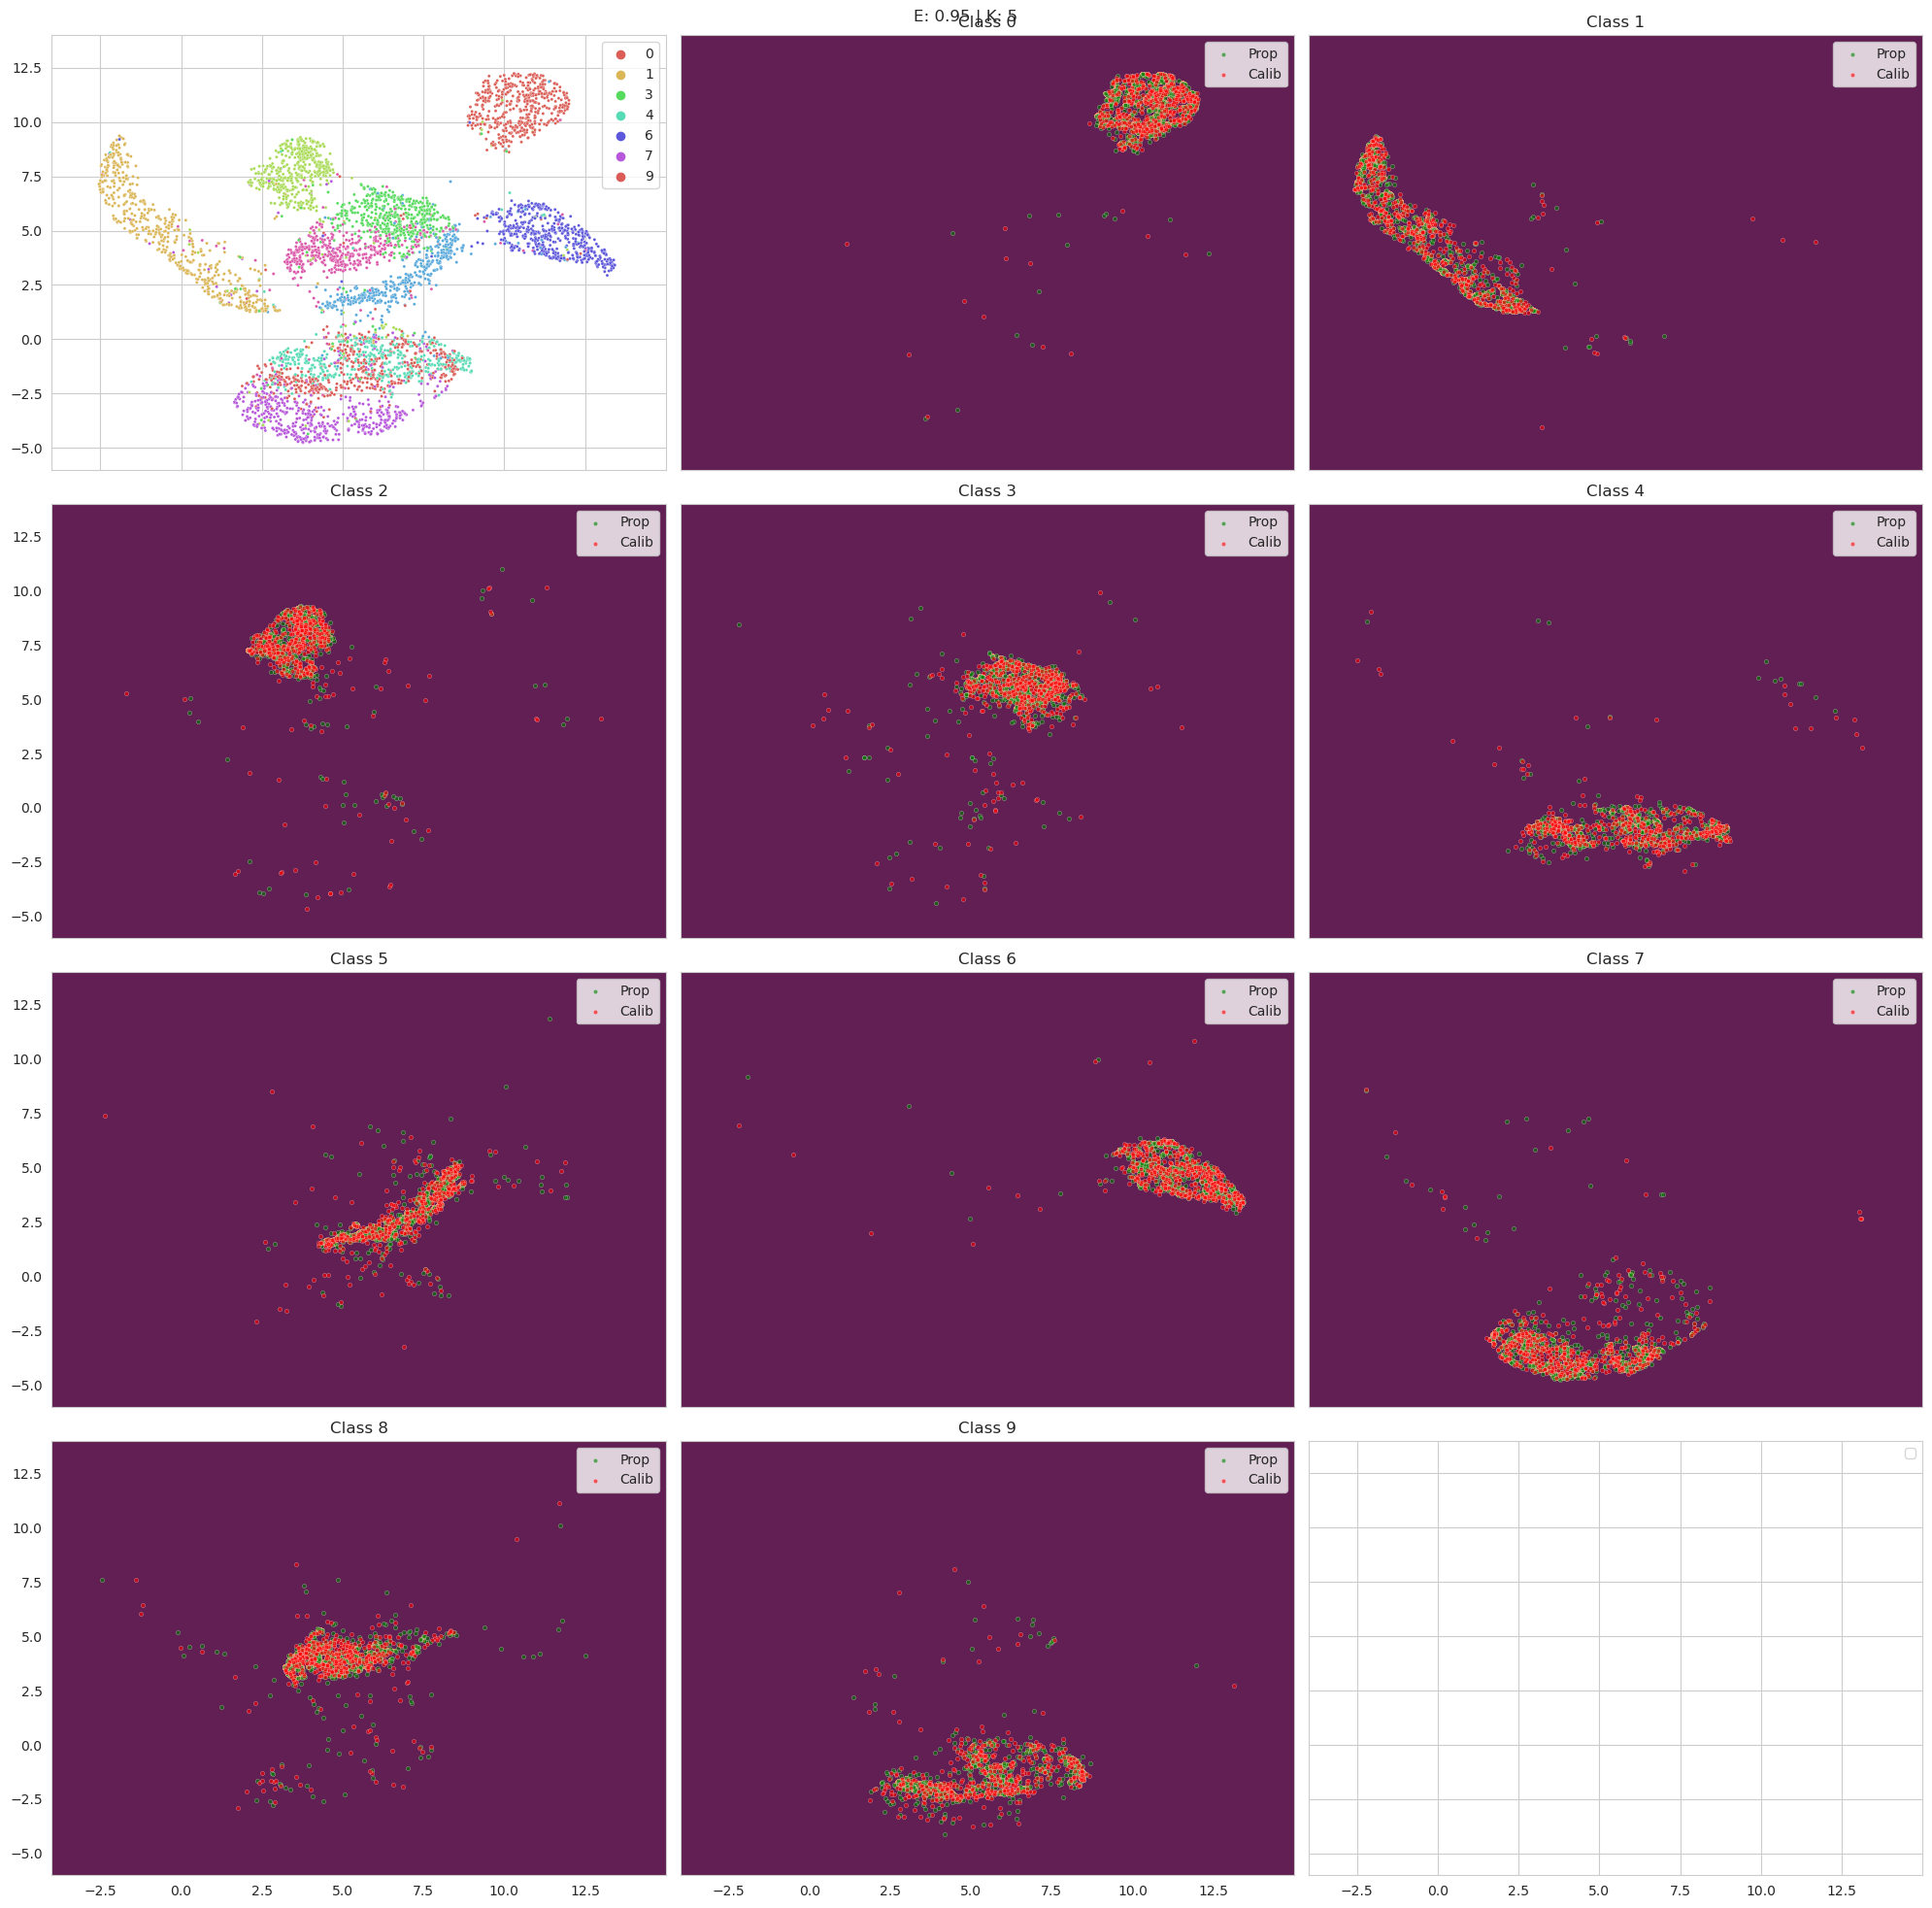

Synthetic samples per class
Label 0: (145024, 2)
Label 1: (128826, 2)
Label 2: (95561, 2)
Label 3: (106896, 2)
Label 4: (93540, 2)
Label 5: (111751, 2)
Label 6: (111745, 2)
Label 7: (125233, 2)
Label 8: (113720, 2)
Label 9: (104111, 2)
(145024,)
(273850,)
(369411,)
(476307,)
(569847,)
(681598,)
(793343,)
(918576,)
(1032296,)
(1136407,)


Baseline results: ORIGINAL
313/313 [==============================] - 0s 785us/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       980
           1       0.90      0.97      0.94      1135
           2       0.88      0.88      0.88      1032
           3       0.53      0.82      0.64      1010
           4       0.52      0.78      0.63       982
           5       0.72      0.39      0.51       892
           6       0.61      0.97      0.75       958
           7       0.73      0.85      0.79      1028
           8       0.96      0.08      0.15       974
           9       0.51      0.23  

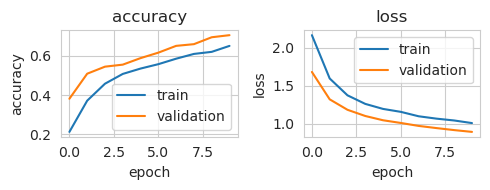

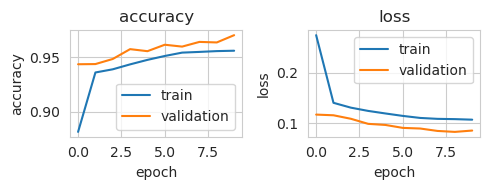

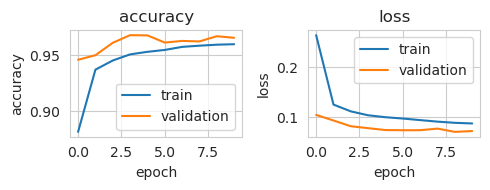

In [8]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[], is_synthetic=True, tf_seed=12)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


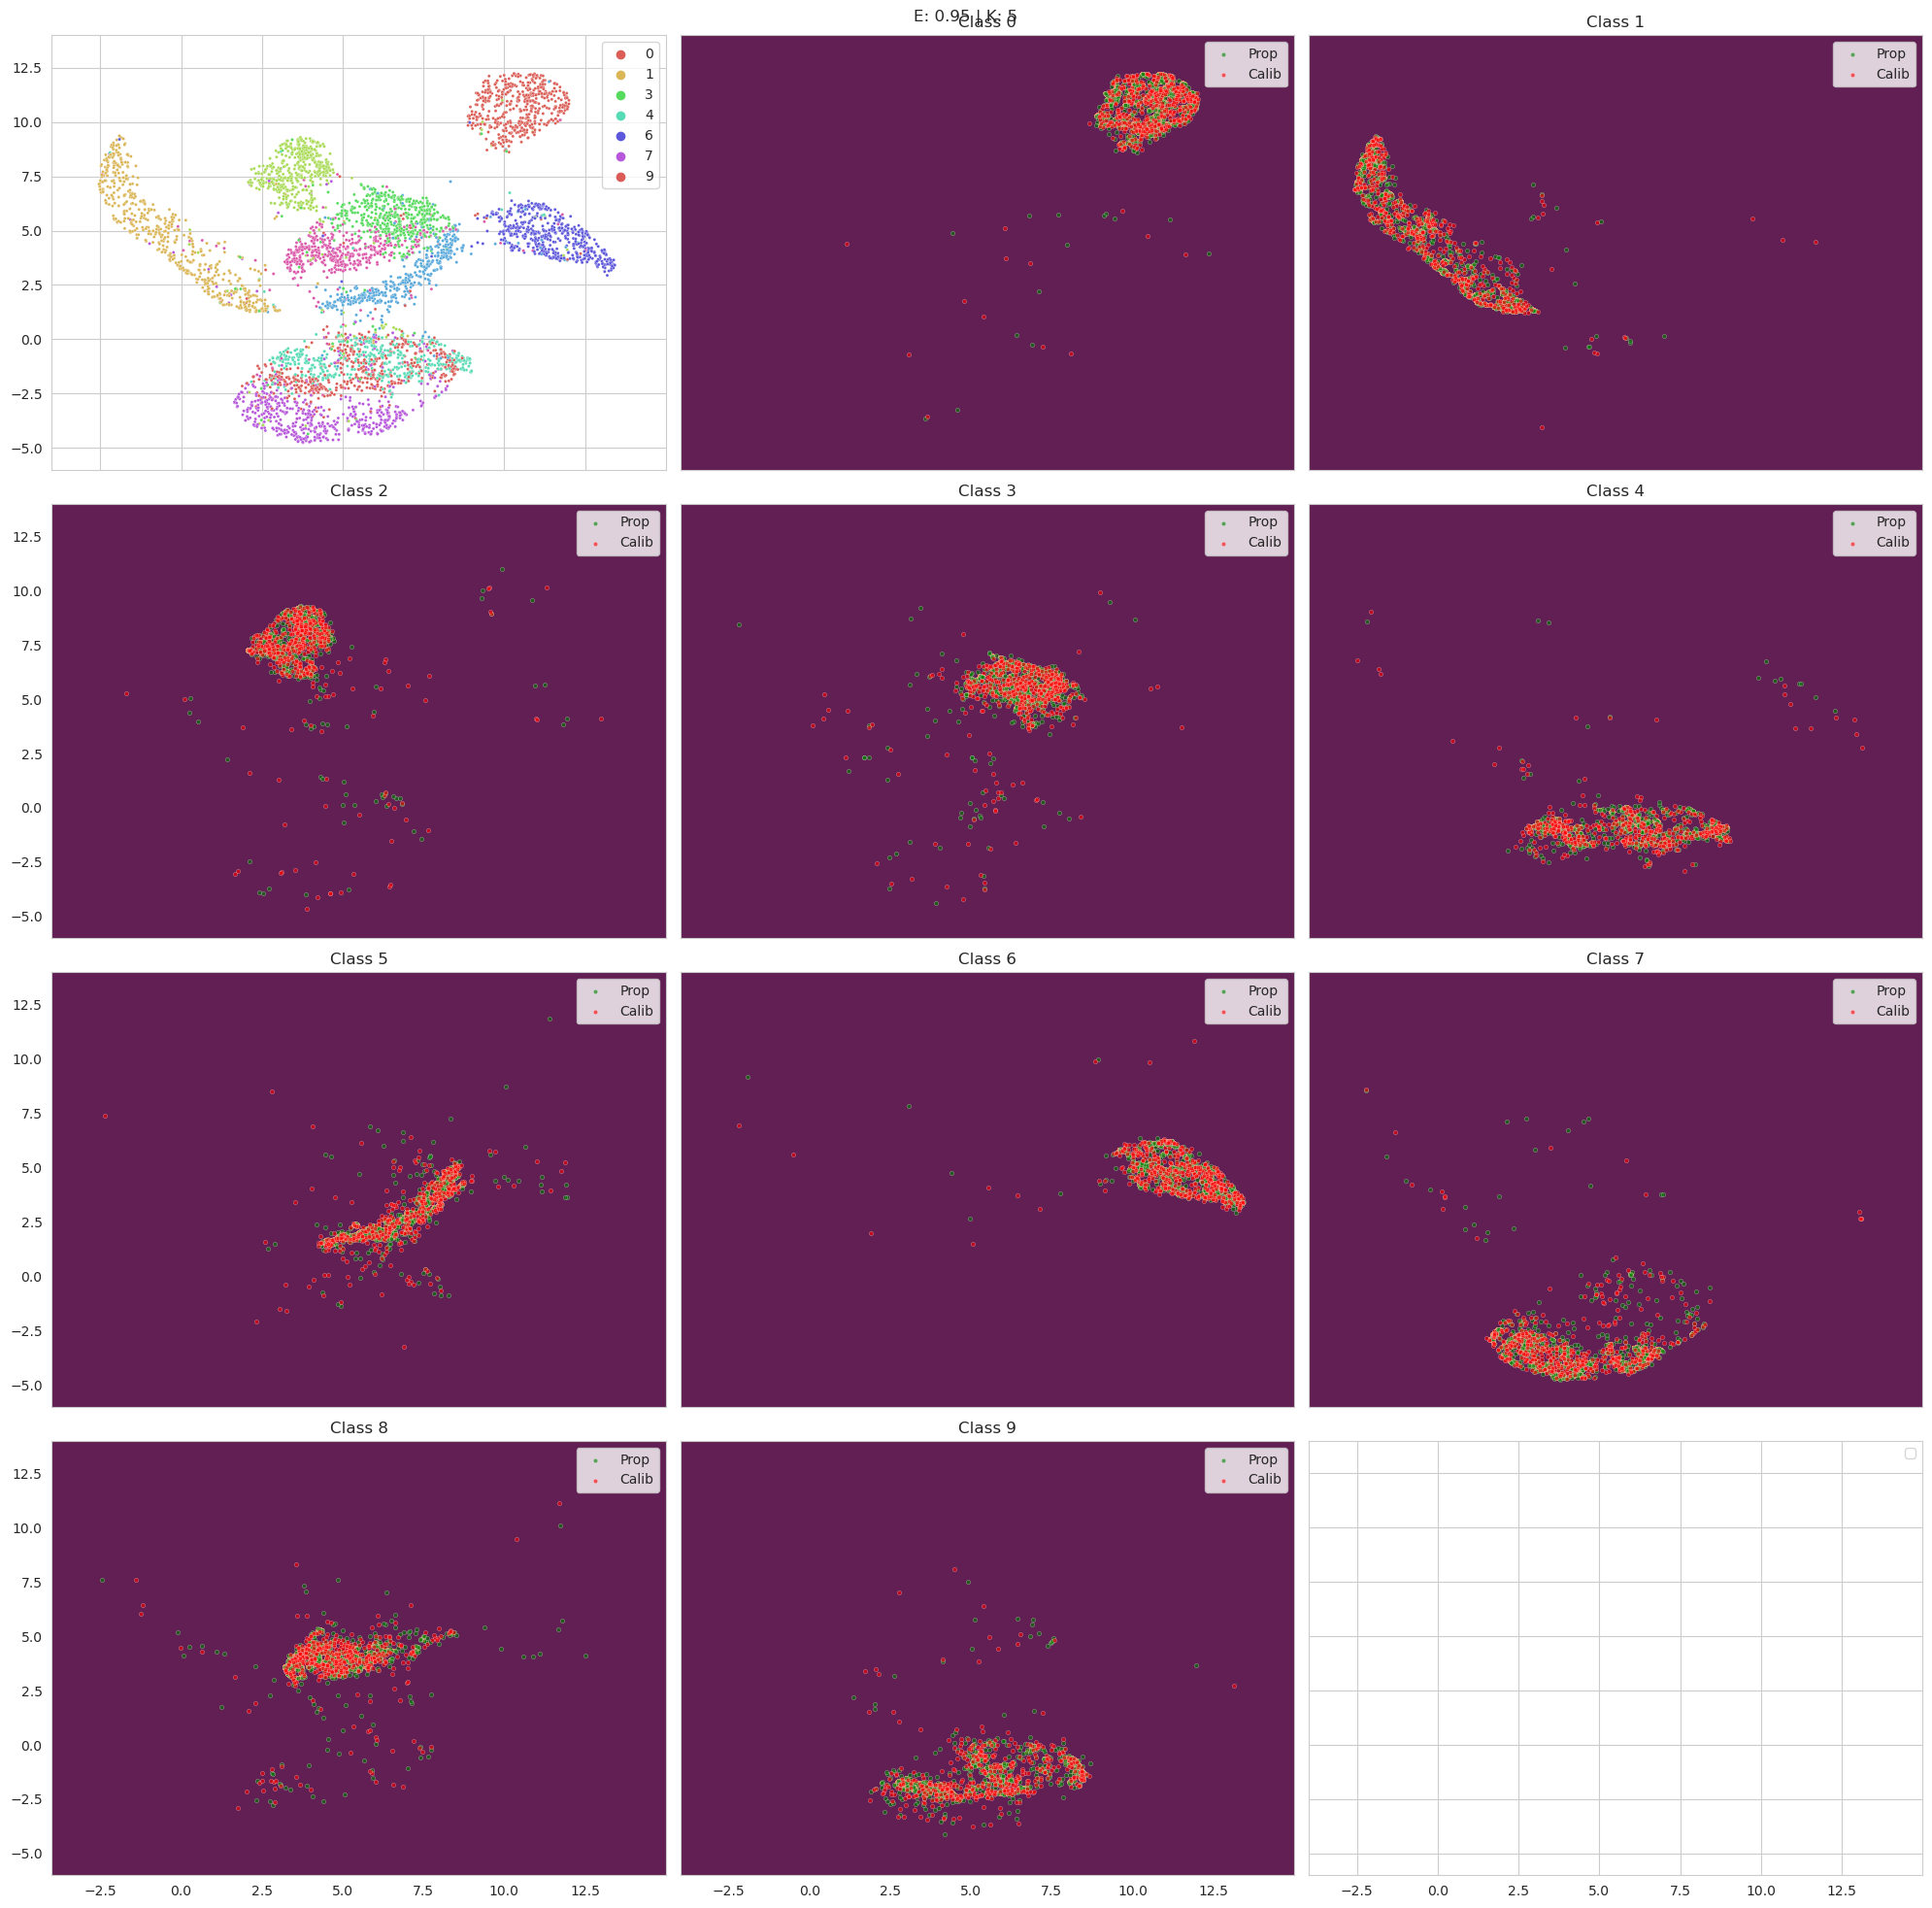

Synthetic samples per class
Label 0: (145024, 2)
Label 1: (128826, 2)
Label 2: (95561, 2)
Label 3: (106896, 2)
Label 4: (93540, 2)
Label 5: (111751, 2)
Label 6: (111745, 2)
Label 7: (125233, 2)
Label 8: (113720, 2)
Label 9: (104111, 2)
(145024,)
(273850,)
(369411,)
(476307,)
(569847,)
(681598,)
(793343,)
(918576,)
(1032296,)
(1136407,)


Baseline results: ORIGINAL
313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       980
           1       0.90      0.97      0.93      1135
           2       0.97      0.87      0.92      1032
           3       0.87      0.70      0.77      1010
           4       0.51      0.88      0.65       982
           5       0.77      0.34      0.48       892
           6       0.61      0.97      0.75       958
           7       0.74      0.85      0.79      1028
           8       0.76      0.82      0.79       974
           9       0.58      0.13    

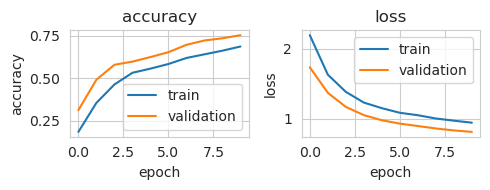

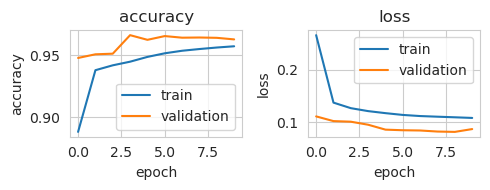

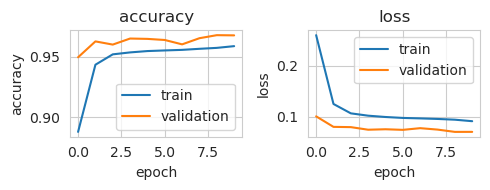

In [9]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[], is_synthetic=True, tf_seed=42)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


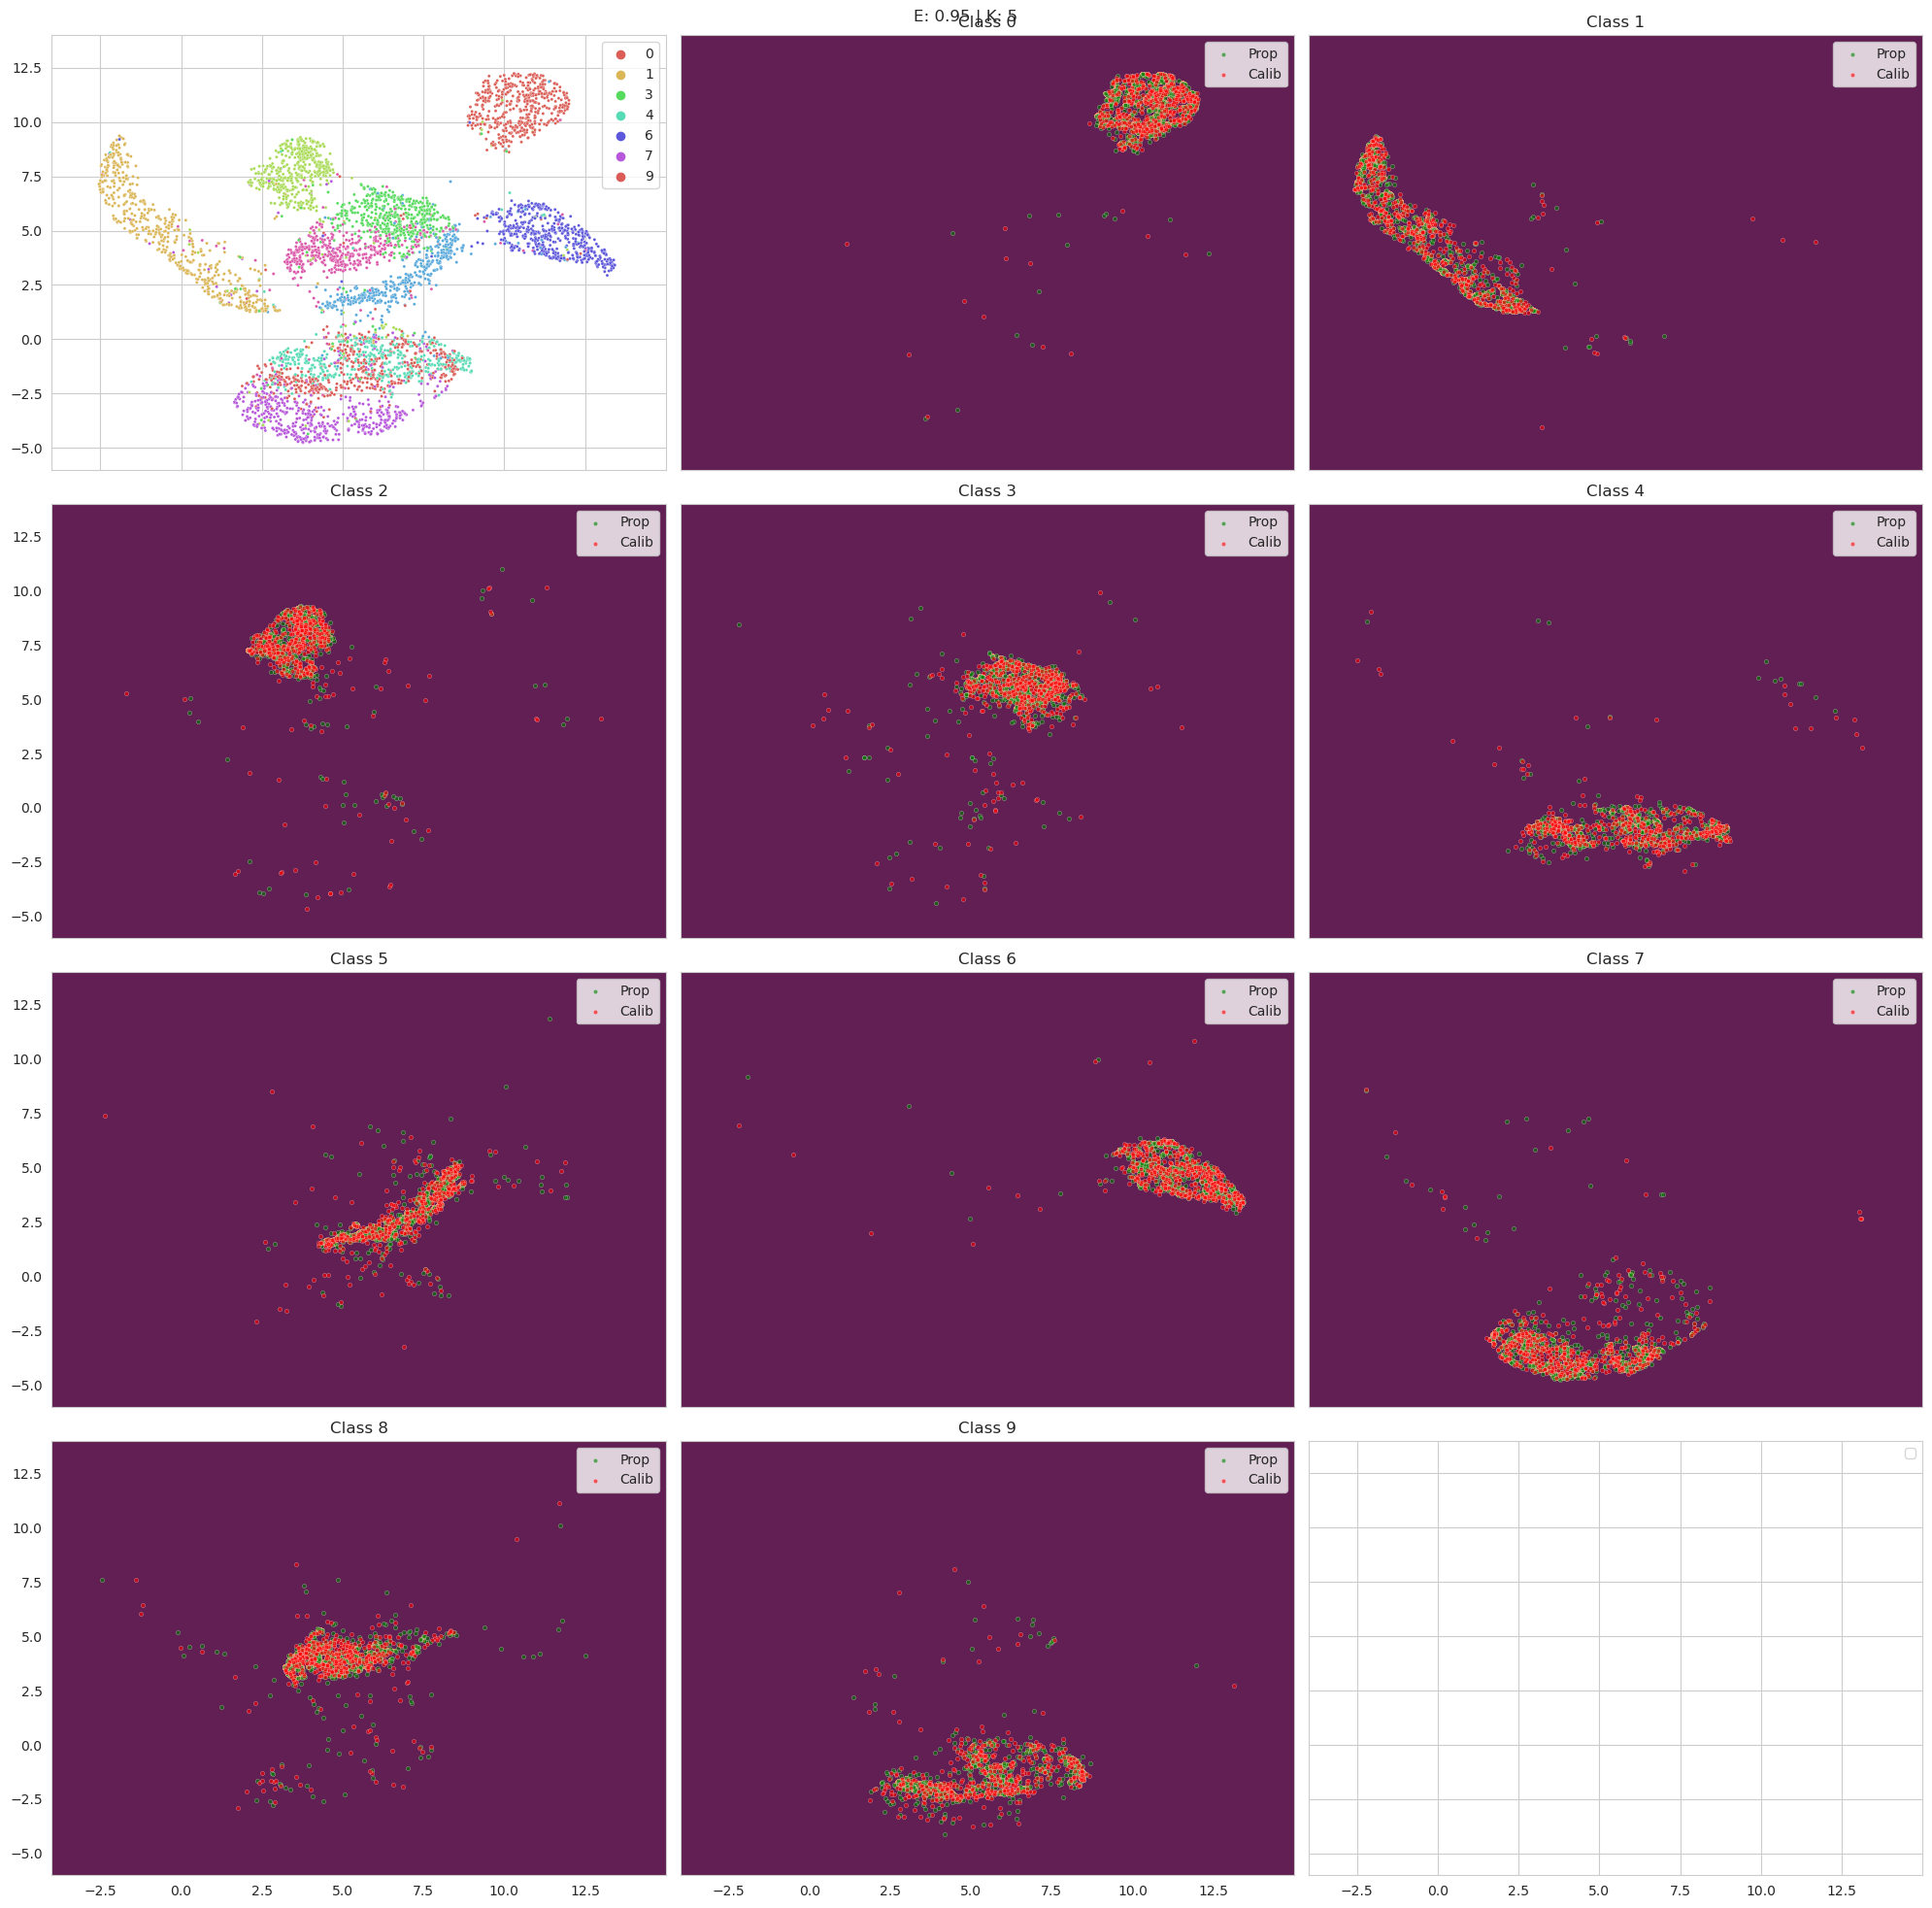

Synthetic samples per class
Label 0: (145024, 2)
Label 1: (128826, 2)
Label 2: (95561, 2)
Label 3: (106896, 2)
Label 4: (93540, 2)
Label 5: (111751, 2)
Label 6: (111745, 2)
Label 7: (125233, 2)
Label 8: (113720, 2)
Label 9: (104111, 2)
(145024,)
(273850,)
(369411,)
(476307,)
(569847,)
(681598,)
(793343,)
(918576,)
(1032296,)
(1136407,)


Baseline results: ORIGINAL
313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       980
           1       0.90      0.99      0.94      1135
           2       0.94      0.88      0.91      1032
           3       0.66      0.83      0.73      1010
           4       0.52      0.81      0.63       982
           5       0.74      0.43      0.54       892
           6       0.63      0.96      0.77       958
           7       0.80      0.84      0.82      1028
           8       0.94      0.44      0.60       974
           9       0.55      0.27    

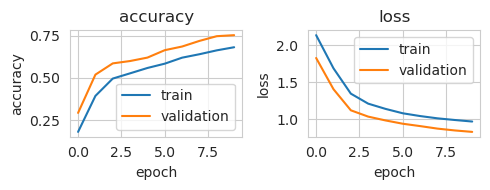

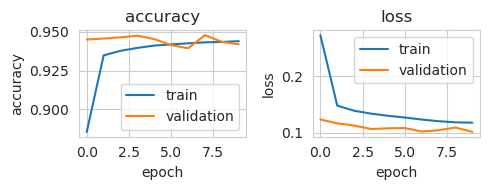

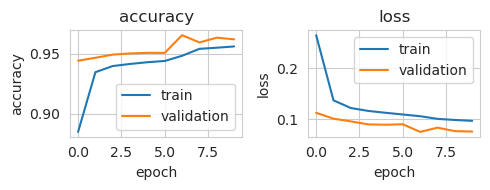

In [10]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[], is_synthetic=True, tf_seed=50)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


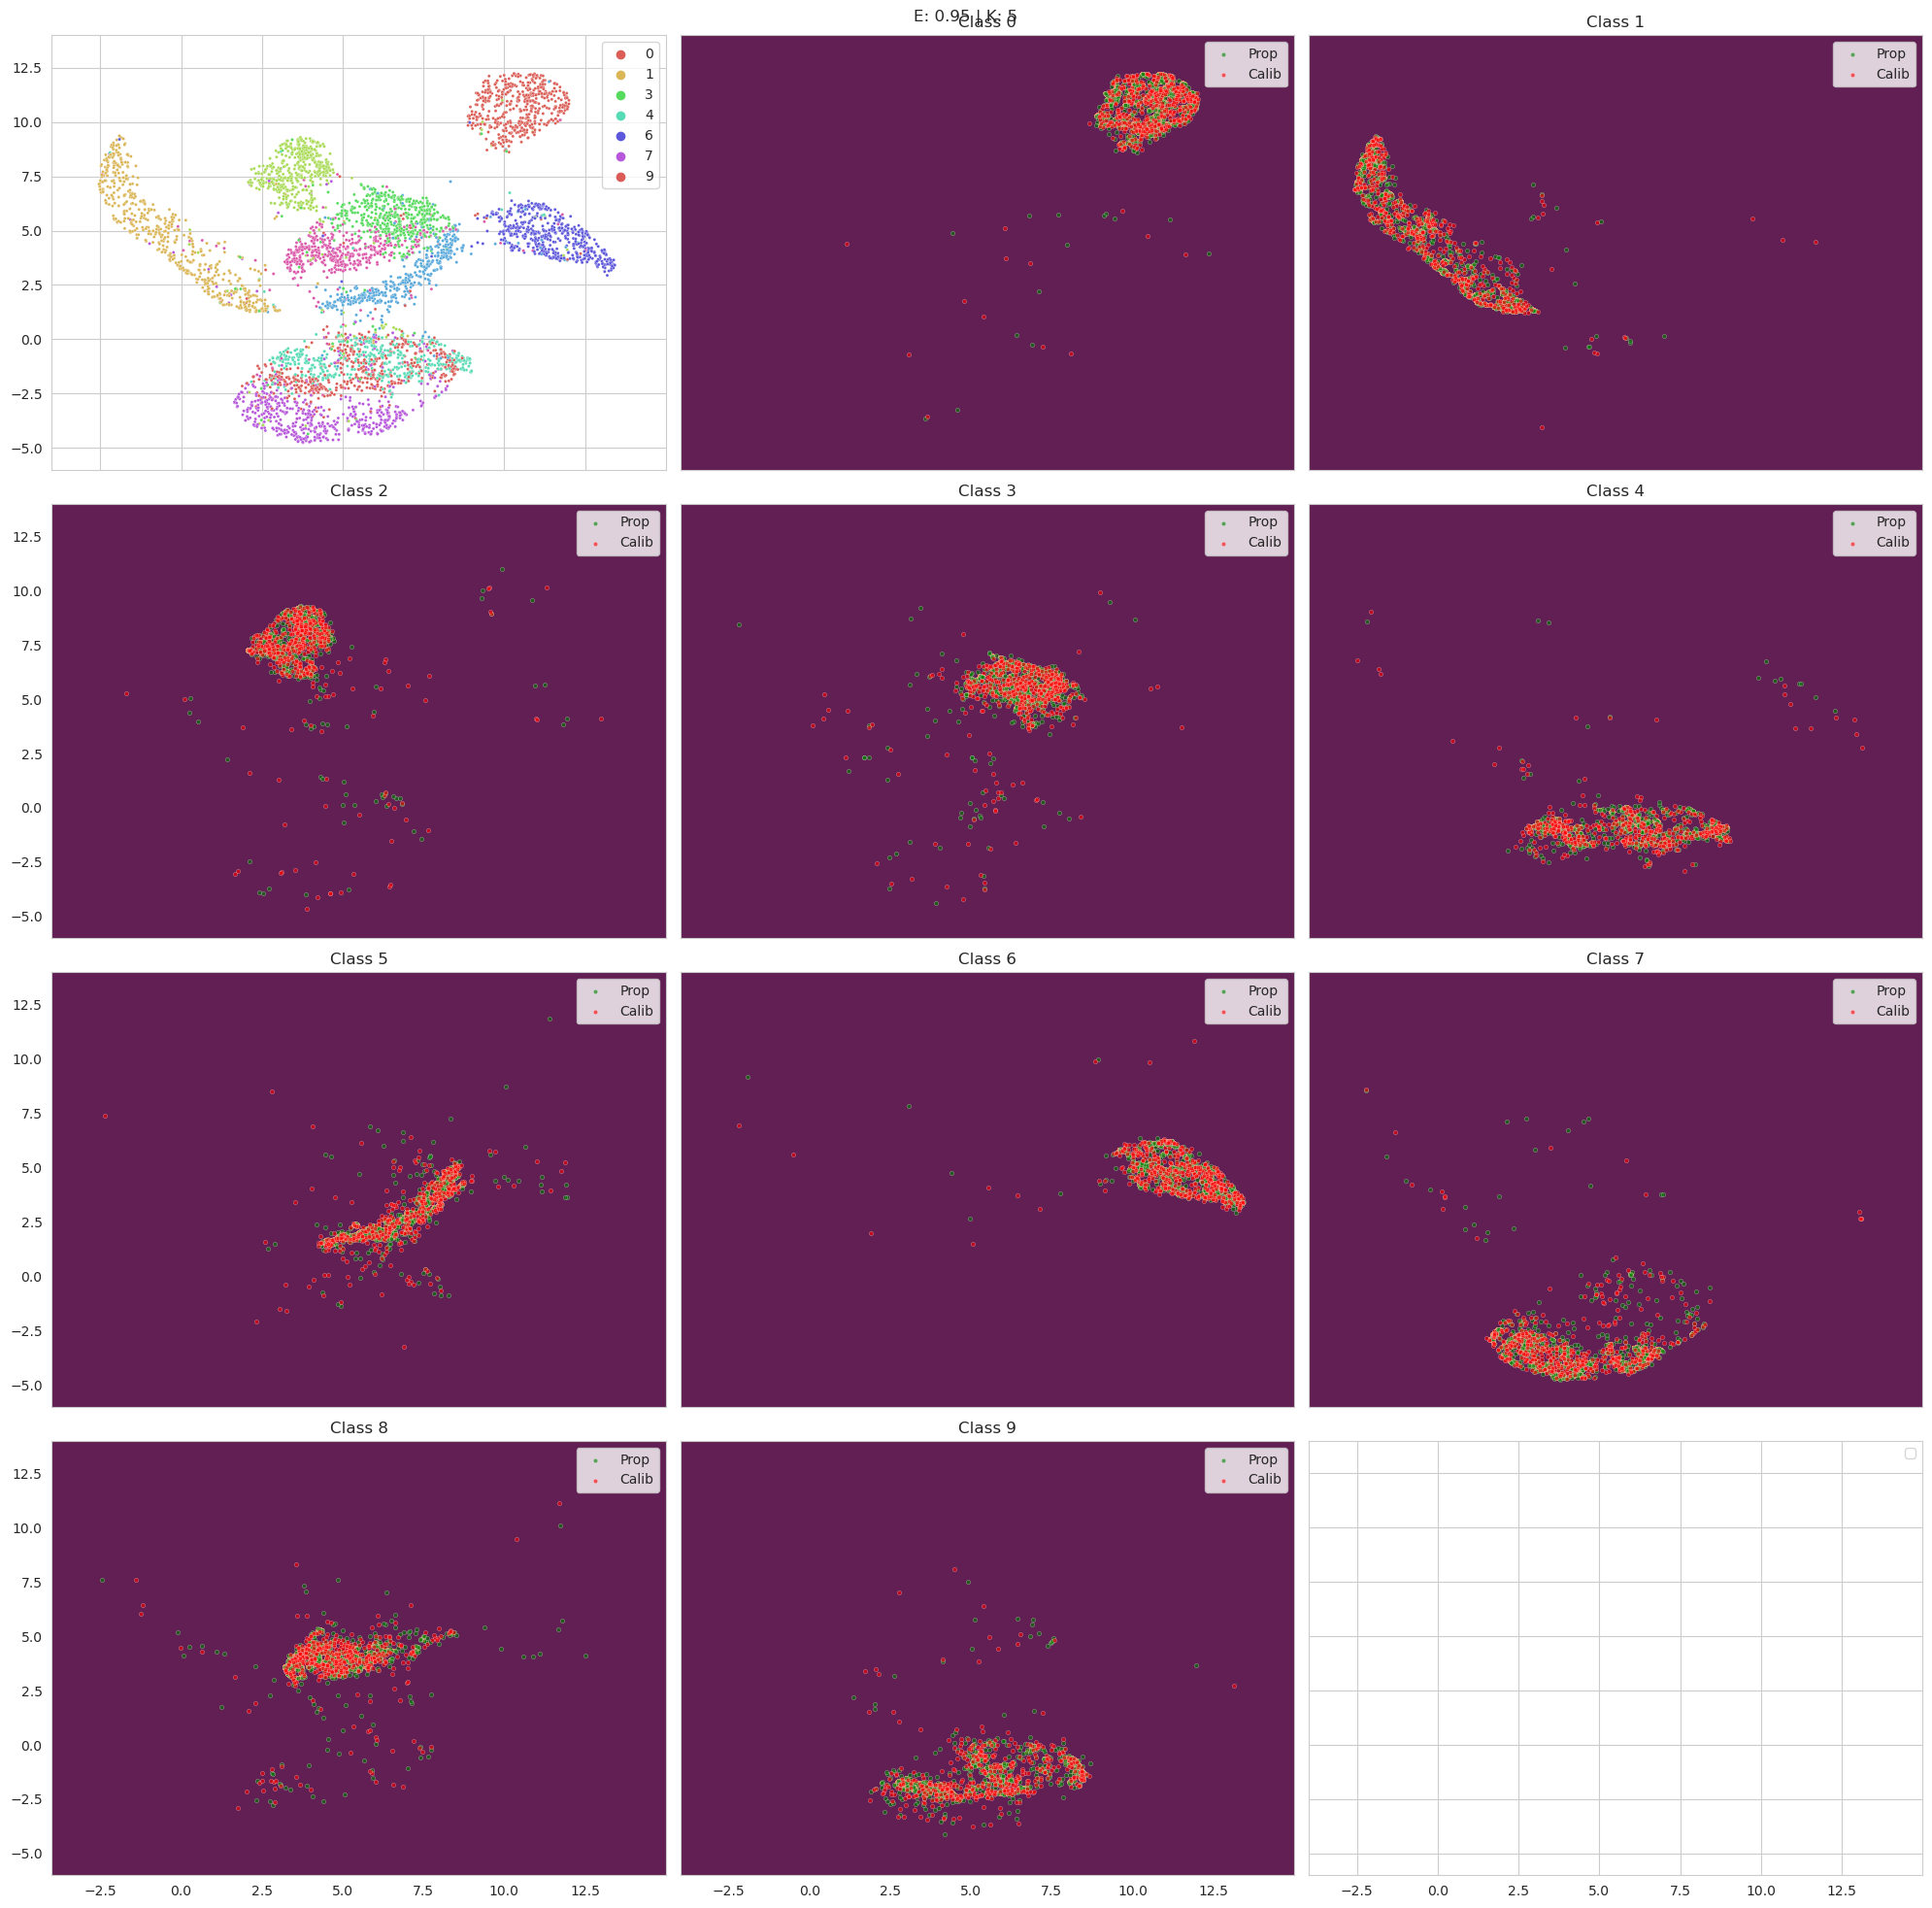

Synthetic samples per class
Label 0: (145024, 2)
Label 1: (128826, 2)
Label 2: (95561, 2)
Label 3: (106896, 2)
Label 4: (93540, 2)
Label 5: (111751, 2)
Label 6: (111745, 2)
Label 7: (125233, 2)
Label 8: (113720, 2)
Label 9: (104111, 2)
(145024,)
(273850,)
(369411,)
(476307,)
(569847,)
(681598,)
(793343,)
(918576,)
(1032296,)
(1136407,)


Baseline results: ORIGINAL
313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       980
           1       0.89      0.99      0.94      1135
           2       0.89      0.88      0.89      1032
           3       0.71      0.67      0.69      1010
           4       0.52      0.90      0.66       982
           5       0.70      0.57      0.63       892
           6       0.70      0.96      0.81       958
           7       0.87      0.83      0.85      1028
           8       0.94      0.49      0.64       974
           9       0.68      0.28    

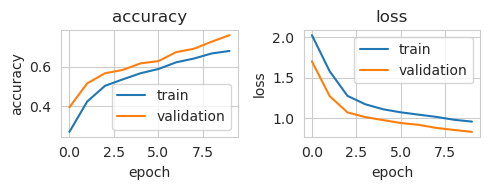

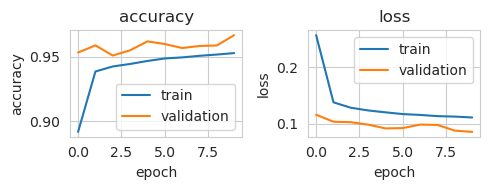

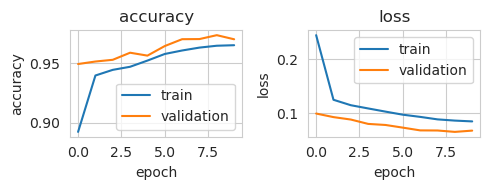

In [11]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[], is_synthetic=True, tf_seed=100)